# Linear Regression

In [1]:
import numpy as np
import pandas as pd

data_x_df = pd.read_csv('X.csv')
data_t_df = pd.read_csv('T.csv')

# Split Data

In [2]:
Dimension = 11 #維度

data_x = np.array(data_x_df) #將data_x_df存為numpy array
data_t = np.array(data_t_df) #將data_t_df存為numpy array

total_num = len(data_x)
#print(total_num)
t_num = int(0.85 * len(data_x)) #切割部分做為training data
v_num = len(data_x) - t_num #剩餘做validation data

data_train_x = data_x[0:t_num,:]
data_train_t = data_t[0:t_num,:]
data_validation_x = data_x[t_num:,:]
data_validation_t = data_t[t_num:,:]
#print(data_train.shape)
#print(data_validation.shape)

# 2.1 Feature Selection

## 2.1(a) Evaluate the corresponding RMS error on  training set and valid set

## M = 1

In [3]:
def least_square(datax,datat): #用來求w的最小平方解
    weight_const = np.ones((len(datax),1)) 
    phi = np.concatenate((weight_const,datax),axis = 1)
    return np.dot(np.dot(np.linalg.pinv(np.dot(phi.T,phi)),phi.T),datat)
def RMS_error(predict,real): #計算RMS Error
    error = 0
    for i in range(len(predict)):
        error += (predict[i] - real[i])**2
    return np.sqrt(error/len(predict))
def accuracy(predict,true): #計算準確率(%)
    precision = np.std(true)
    accuracy = np.absolute(predict - true) < precision
    return 100 * np.mean(accuracy)

weight_M1 = least_square(data_train_x,data_train_t)   
#print(weight_M1.shape)
predict_train_x = np.dot(data_train_x,weight_M1[1:]) + weight_M1[0]
RMS_M1_train = RMS_error(predict_train_x,data_train_t)
M1_train_accuracy = accuracy(predict_train_x,data_train_t)
print("Polynomial M = 1:")
print("RMS_M1_train: ",RMS_M1_train)  
print("M1_train_accuracy: ",M1_train_accuracy,"%\n") 

predict_validation_x = np.dot(data_validation_x,weight_M1[1:]) + weight_M1[0]
RMS_M1_validation = RMS_error(predict_validation_x,data_validation_t) 
M1_validation_accuracy = accuracy(predict_validation_x,data_validation_t)
print("RMS_M1_validation: ",RMS_M1_validation) 
print("M1_validation_accuracy: ",M1_validation_accuracy,"%") 

Polynomial M = 1:
RMS_M1_train:  [0.64078163]
M1_train_accuracy:  81.08903605592347 %

RMS_M1_validation:  [0.67766329]
M1_validation_accuracy:  78.75 %


## M = 2

In [4]:
def transform_phi_least_square(number,datax,datat): #製作M=2的Phi並算出weight
    weight_const = np.ones((number,1))
    temp_matrix = np.zeros((number,Dimension*Dimension))
    for i in range(number):
        temp = 0
        for j in range(Dimension):
            for k in range(Dimension):
                temp_matrix[i,temp] = datax[i,j] * datax[i,k]
                temp += 1
    phi = np.concatenate((weight_const, datax, temp_matrix),axis = 1)
    #print(phi)
    return np.dot(np.dot(np.linalg.pinv(np.dot(phi.T,phi)),phi.T),datat),phi

weight_M2,phi_train_matrix = transform_phi_least_square(t_num,data_train_x,data_train_t) 
#print(phi_train_matrix.shape)
#print(weight_M2.shape)
predict_train_x_M2 = np.dot(phi_train_matrix,weight_M2)
RMS_M2_train = RMS_error(predict_train_x_M2,data_train_t)
M2_train_accuracy = accuracy(predict_train_x_M2,data_train_t)
print("Polynomial M = 2:")
print("RMS_M2_train: ",RMS_M2_train)  
print("M2_train_accuracy: ",M2_train_accuracy,"%\n") 

temp_weight_M2,phi_validation_matrix = transform_phi_least_square(v_num,data_validation_x,data_validation_t) 
#print(phi_validation_matrix.shape)
#print(temp_weight_M2.shape)
predict_validation_x_M2 = np.dot(phi_validation_matrix,weight_M2)
RMS_M2_validation = RMS_error(predict_validation_x_M2,data_validation_t) 
M2_validation_accuracy = accuracy(predict_validation_x_M2,data_validation_t)
print("RMS_M2_validation: ",RMS_M2_validation) 
print("M2_validation_accuracy: ",M2_validation_accuracy,"%") 

Polynomial M = 2:
RMS_M2_train:  [0.59846099]
M2_train_accuracy:  84.03237674760854 %

RMS_M2_validation:  [0.70396571]
M2_validation_accuracy:  78.33333333333333 %


## 2.1(b)analysis the weights for M = 1 and select the most contributive feature

要找出weight中影響最大的feature大概有兩個方法，(1)由於M = 1是線性函數，可以透過觀察weight中各項數值的大小來判斷，但是可能會因為data的大小不同而出錯 (2)因此透過將各個feature的w分別設為0，這樣可以觀察w*feature value的值對RMS error所造成的影響，使RMS error劇烈上升的即為contributive value，我將以第二種作分析。

可以從算出的結果和作出來的圖看出density這個feature對RMS的影響特別大，因此density即為contributve feature。

In [5]:
labels = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
         'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
RMS_train_values = [] #用來存Training RMS值
RMS_validation_values = [] #用來存Validation RMS值

for i in range(Dimension): #分別將各個feature的w設為0，由於w[0]為常數因此不採計    
    weight = least_square(data_train_x,data_train_t)
    weight[i + 1] = 0
    train_x = np.dot(data_train_x,weight[1:]) + weight[0]
    RMS_train = RMS_error(train_x,data_train_t)
    RMS_train_values.append(round(float(RMS_train),8))
    print(labels[i], "weight=0:")
    print("RMS_train: ",RMS_train)  
    validation_x = np.dot(data_validation_x,weight[1:]) + weight[0]
    RMS_validation = RMS_error(validation_x,data_validation_t) 
    RMS_validation_values.append(round(float(RMS_validation),8))
    print("RMS_validation: ",RMS_validation,"\n") 
#print(RMS_train_values)
#print(RMS_validation_values)

fixed acidity weight=0:
RMS_train:  [0.67378336]
RMS_validation:  [0.67497038] 

volatile acidity weight=0:
RMS_train:  [0.87443571]
RMS_validation:  [0.99321112] 

citric acid weight=0:
RMS_train:  [0.64335575]
RMS_validation:  [0.68263341] 

residual sugar weight=0:
RMS_train:  [0.64108315]
RMS_validation:  [0.67700991] 

chlorides weight=0:
RMS_train:  [0.66263721]
RMS_validation:  [0.71573455] 

free sulfur dioxide weight=0:
RMS_train:  [0.64367363]
RMS_validation:  [0.67908843] 

total sulfur dioxide weight=0:
RMS_train:  [0.67015095]
RMS_validation:  [0.70770361] 

density weight=0:
RMS_train:  [17.46443812]
RMS_validation:  [17.54984537] 

pH weight=0:
RMS_train:  [1.2262248]
RMS_validation:  [1.34631188] 

sulphates weight=0:
RMS_train:  [0.85848938]
RMS_validation:  [0.82858704] 

alcohol weight=0:
RMS_train:  [2.98150647]
RMS_validation:  [2.90749623] 



## Plot

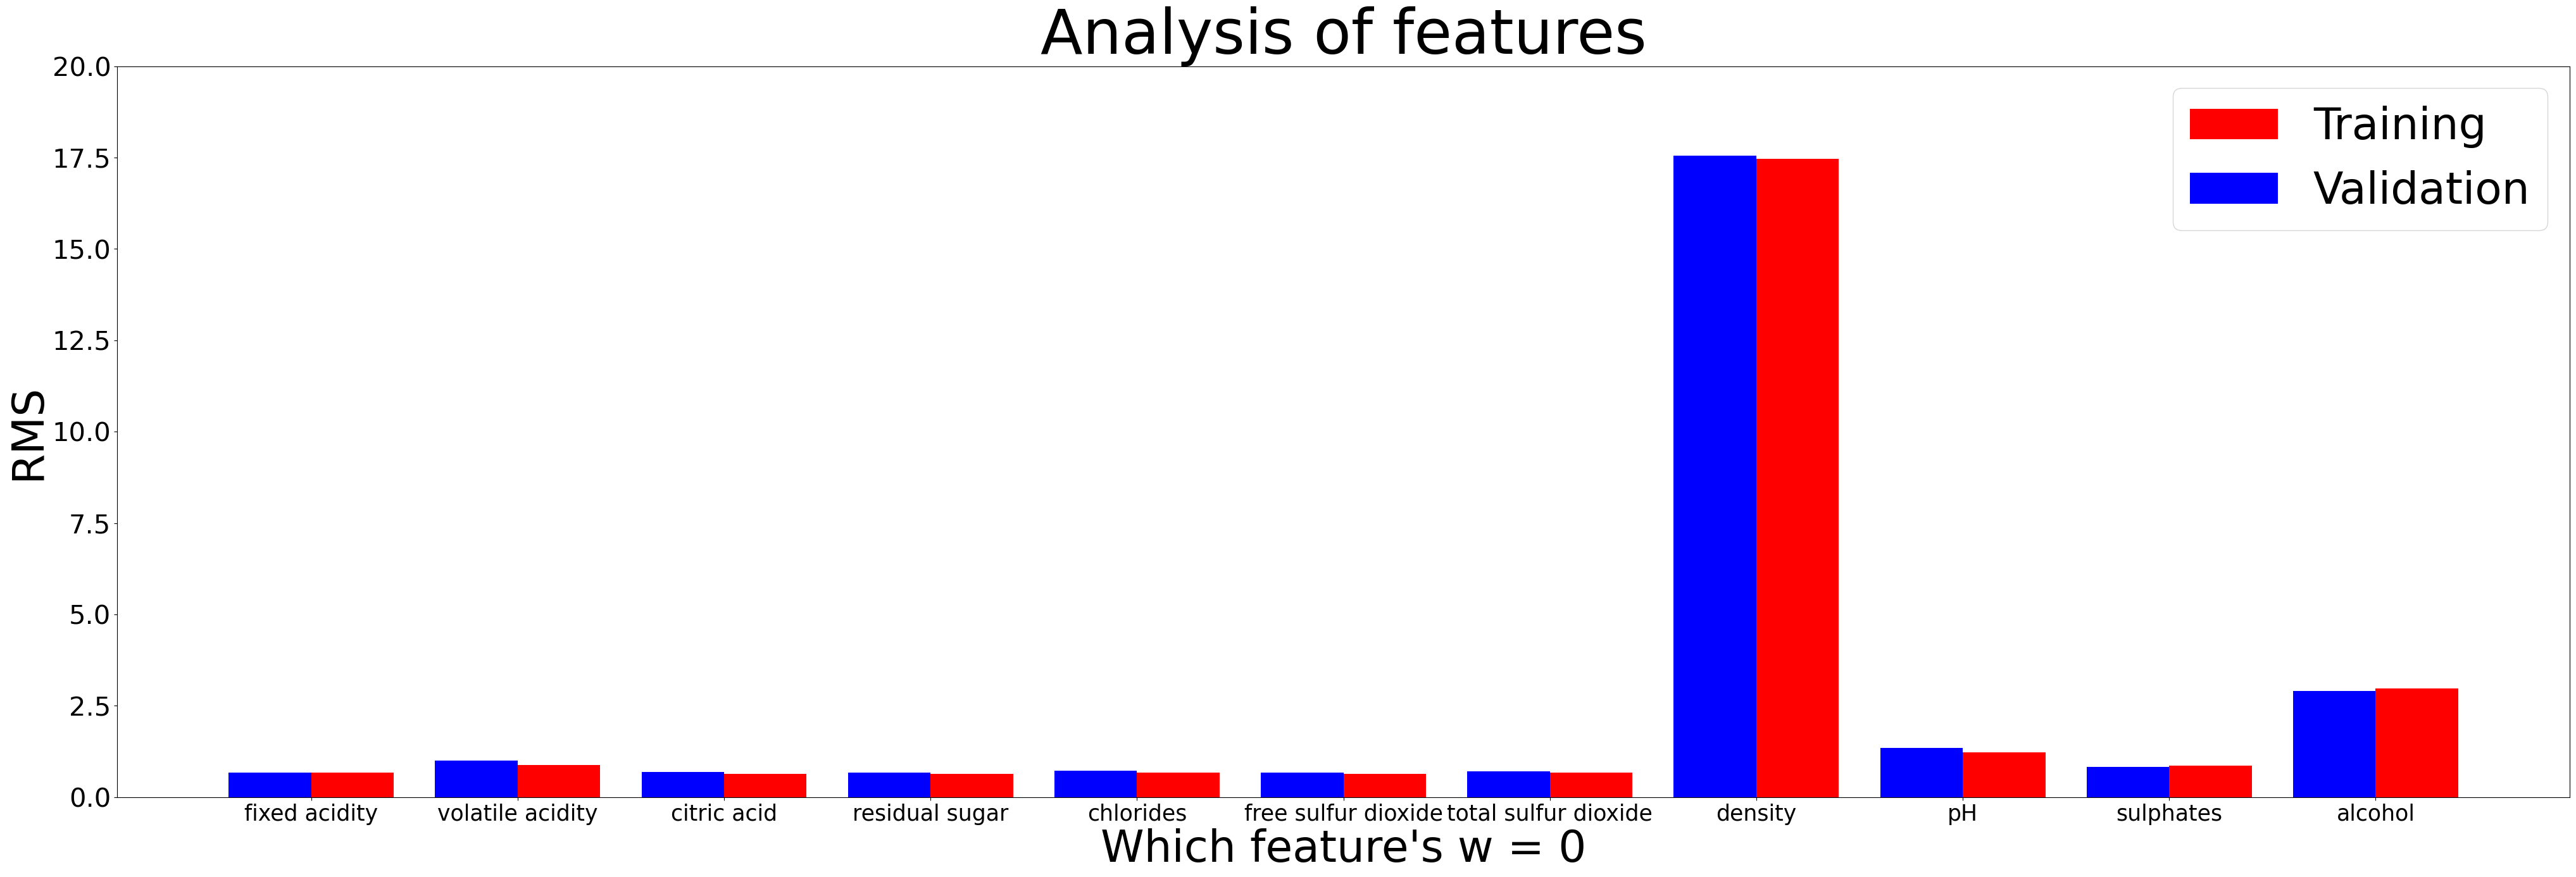

In [6]:
#透過作圖觀察RMS的變化

import matplotlib.pyplot as plt
plt.figure(figsize=(50,15))
plt.bar(labels, RMS_train_values, label = 'Training', align = "edge", width = 0.4,color = 'red')
plt.bar(labels, RMS_validation_values, label = 'Validation', align = "edge", width = -0.4,color = 'blue')
plt.title("Analysis of features", fontsize = 70)
plt.xlabel("Which feature's w = 0", fontsize = 50)
plt.ylabel("RMS", fontsize = 50)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 30)
plt.ylim(0,20)
plt.legend(fontsize = 50)
plt.show()

# 2.2 Maximum likelihood approach

## 2.2(a)Which basis function will you use to further improve your regression model

我分別使用三種Basis Function去進行M = 1和M = 2時RMS的計算，發現用Polynomial當Basis Function的效果稍微好一些，RMS的值稍微小一些，雖然Polynomial和Sigmoid的RMS非常接近，但Polynomial對validation的效果稍微好一點，因此我選擇使用Polynomial當作Basis Function。

## 2.2(b)Introduce the basis function you just decided in (a) to linear regression model and analyze the result you get.

## Gaussian Basis Function

## M =1

In [7]:
def Gaussian_function(x): #定義GAUSSIAN FUNCTION
    temp = np.zeros((len(x),len(x[0])))
    mean = np.zeros((Dimension,1))
    for i in range(Dimension):
        mean[i] = np.sum(x[:,i]) / len(x)
    variance = np.zeros((Dimension,1))
    for i in range(Dimension):
        variance[i] = np.sum((x[:,i] - mean[i])**2) / len(x)
    for i in range(len(x[0])):
        for j in range(len(x)):
            temp[j,i] = np.exp(-(x[j,i] - mean[i])**2/(2*(variance[i]**2)))
    return temp

#print(data_train_x)
Gaussian_data_train_x = Gaussian_function(data_train_x)
#print(data_train_x)  
weight_Gaussian_M1 = least_square(Gaussian_data_train_x,data_train_t)
 
#print(weight_Gaussian_M1)
predict_Gaussian_train_x = np.dot(Gaussian_data_train_x,weight_Gaussian_M1[1:]) + weight_Gaussian_M1[0]
RMS_Gaussian_M1_train = RMS_error(predict_Gaussian_train_x,data_train_t)
M1_Gaussian_train_accuracy = accuracy(predict_Gaussian_train_x,data_train_t)
print("Gaussian M = 1:")
print("RMS_Gaussian_M1_train: ",RMS_Gaussian_M1_train)  
print("M1_Gaussian_train_accuracy: ",M1_Gaussian_train_accuracy,"%\n") 

Gaussian_data_validation_x = Gaussian_function(data_validation_x)
predict_Gaussian_validation_x = np.dot(Gaussian_data_validation_x,weight_Gaussian_M1[1:]) + weight_Gaussian_M1[0]
RMS_Gaussian_M1_validation = RMS_error(predict_Gaussian_validation_x,data_validation_t) 
M1_Gaussian_validation_accuracy = accuracy(predict_Gaussian_validation_x,data_validation_t)
print("RMS_Gaussian_M1_validation: ",RMS_Gaussian_M1_validation) 
print("M1_Gaussian_validation_accuracy: ",M1_Gaussian_validation_accuracy,"%")          

Gaussian M = 1:
RMS_Gaussian_M1_train:  [0.77212188]
M1_Gaussian_train_accuracy:  79.10228108903605 %

RMS_Gaussian_M1_validation:  [0.8393091]
M1_Gaussian_validation_accuracy:  73.75 %


## M = 2

In [8]:
Gaussian_temp_train = Gaussian_function(data_train_x)
weight_Gaussian_M2,phi_Gaussian_train_matrix = transform_phi_least_square(t_num, Gaussian_temp_train, data_train_t) 
#print(phi_Gaussian_train_matrix.shape)
#print(weight_Gaussian_M2.shape)
predict_Gaussian_train_x_M2 = np.dot(phi_Gaussian_train_matrix, weight_Gaussian_M2)
RMS_Gaussian_M2_train = RMS_error(predict_Gaussian_train_x_M2, data_train_t)
M2_Gaussian_train_accuracy = accuracy(predict_Gaussian_train_x_M2, data_train_t)
print("Gaussian M = 2:")
print("RMS_Gaussian_M2_train: ", RMS_Gaussian_M2_train)  
print("M2_Gaussian_train_accuracy: ", M2_Gaussian_train_accuracy,"%\n") 

Gaussian_temp_validation = Gaussian_function(data_validation_x)
temp_Gaussian_weight_M2,phi_Gaussian_validation_matrix = transform_phi_least_square(v_num, Gaussian_temp_validation, data_validation_t) 
#print(phi_Gaussian_validation_matrix.shape)
#print(temp_Gaussian_weight_M2.shape)
predict_Gaussian_validation_x_M2 = np.dot(phi_Gaussian_validation_matrix, weight_Gaussian_M2)
RMS_Gaussian_M2_validation = RMS_error(predict_Gaussian_validation_x_M2, data_validation_t) 
M2_Gaussian_validation_accuracy = accuracy(predict_Gaussian_validation_x_M2, data_validation_t)
print("RMS_Gaussian_M2_validation: ", RMS_Gaussian_M2_validation) 
print("M2_Gaussian_validation_accuracy: ", M2_Gaussian_validation_accuracy,"%") 

Gaussian M = 2:
RMS_Gaussian_M2_train:  [0.71650612]
M2_Gaussian_train_accuracy:  82.04562178072112 %

RMS_Gaussian_M2_validation:  [0.907709]
M2_Gaussian_validation_accuracy:  70.0 %


## Sigmoid Basis Function

## M = 1

In [9]:
def sigmoid_function(x): #定義Sigmoid FUNCTION
    temp = np.zeros((len(x),len(x[0])))
    mean = np.zeros((Dimension,1))
    for i in range(Dimension):
        mean[i] = np.sum(x[:,i]) / len(x)
    for i in range(len(x[0])):
        for j in range(len(x)):
            temp[j,i] = 1/(1 + np.exp(-(x[j,i] - mean[i])))
    return temp

#print(data_train_x)
sigmoid_data_train_x = sigmoid_function(data_train_x)
#print(data_train_x)  
weight_sigmoid_M1 = least_square(sigmoid_data_train_x,data_train_t)
 
#print(weight_sigmoid_M1)
predict_sigmoid_train_x = np.dot(sigmoid_data_train_x,weight_sigmoid_M1[1:]) + weight_sigmoid_M1[0]
RMS_sigmoid_M1_train = RMS_error(predict_sigmoid_train_x,data_train_t)
M1_sigmoid_train_accuracy = accuracy(predict_sigmoid_train_x,data_train_t)
print("Sigmoid M = 1:")
print("RMS_sigmoid_M1_train: ",RMS_sigmoid_M1_train)  
print("M1_sigmoid_train_accuracy: ",M1_sigmoid_train_accuracy,"%\n") 

sigmoid_data_validation_x = sigmoid_function(data_validation_x)
predict_sigmoid_validation_x = np.dot(sigmoid_data_validation_x,weight_sigmoid_M1[1:]) + weight_sigmoid_M1[0]
RMS_sigmoid_M1_validation = RMS_error(predict_sigmoid_validation_x,data_validation_t) 
M1_sigmoid_validation_accuracy = accuracy(predict_sigmoid_validation_x,data_validation_t)
print("RMS_sigmoid_M1_validation: ",RMS_sigmoid_M1_validation) 
print("M1_sigmoid_validation_accuracy: ",M1_sigmoid_validation_accuracy,"%") 

Sigmoid M = 1:
RMS_sigmoid_M1_train:  [0.63962191]
M1_sigmoid_train_accuracy:  81.67770419426049 %

RMS_sigmoid_M1_validation:  [0.68668618]
M1_sigmoid_validation_accuracy:  78.33333333333333 %


## M = 2

In [10]:
sigmoid_temp_train = sigmoid_function(data_train_x)
weight_sigmoid_M2,phi_sigmoid_train_matrix = transform_phi_least_square(t_num, sigmoid_temp_train, data_train_t) 
#print(phi_sigmoid_train_matrix.shape)
#print(weight_sigmoid_M2.shape)
predict_sigmoid_train_x_M2 = np.dot(phi_sigmoid_train_matrix, weight_sigmoid_M2)
RMS_sigmoid_M2_train = RMS_error(predict_sigmoid_train_x_M2, data_train_t)
M2_sigmoid_train_accuracy = accuracy(predict_sigmoid_train_x_M2, data_train_t)
print("Sigmoid M = 2:")
print("RMS_sigmoid_M2_train: ", RMS_sigmoid_M2_train)  
print("M2_sigmoid_train_accuracy: ", M2_sigmoid_train_accuracy,"%\n") 

sigmoid_temp_validation = sigmoid_function(data_validation_x)
temp_sigmoid_weight_M2,phi_sigmoid_validation_matrix = transform_phi_least_square(v_num, sigmoid_temp_validation, data_validation_t) 
#print(phi_sigmoid_validation_matrix.shape)
#print(temp_sigmoid_weight_M2.shape)
predict_sigmoid_validation_x_M2 = np.dot(phi_sigmoid_validation_matrix, weight_sigmoid_M2)
RMS_sigmoid_M2_validation = RMS_error(predict_sigmoid_validation_x_M2, data_validation_t) 
M2_sigmoid_validation_accuracy = accuracy(predict_sigmoid_validation_x_M2, data_validation_t)
print("RMS_sigmoid_M2_validation: ", RMS_sigmoid_M2_validation) 
print("M2_sigmoid_validation_accuracy: ", M2_sigmoid_validation_accuracy,"%") 

Sigmoid M = 2:
RMS_sigmoid_M2_train:  [0.5975065]
M2_sigmoid_train_accuracy:  84.4738778513613 %

RMS_sigmoid_M2_validation:  [0.70727267]
M2_sigmoid_validation_accuracy:  77.5 %


## Plot Basis Function RMS

## M = 1

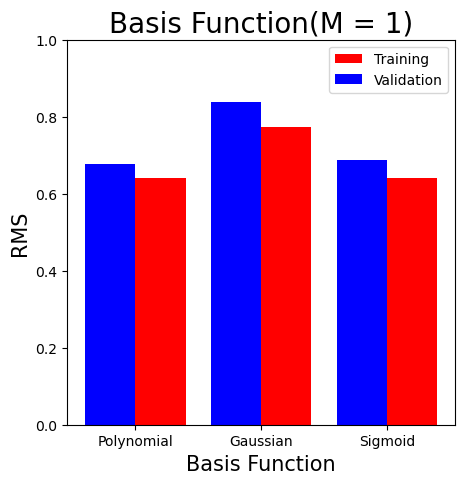

M = 1
Polynomial :

RMS_train : 0.6407816319224392
RMS_validation : 0.6776632932018127 

Gaussian :

RMS_train : 0.7721218842579711
RMS_validation : 0.8393091006265121 

Sigmoid :

RMS_train : 0.6396219090305546
RMS_validation : 0.6866861807428465 



In [11]:
#透過作圖觀察M = 1 RMS的變化

RMS_basis_train = [RMS_M1_train[0], RMS_Gaussian_M1_train[0], RMS_sigmoid_M1_train[0]]
RMS_basis_validation = [RMS_M1_validation[0], RMS_Gaussian_M1_validation[0], RMS_sigmoid_M1_validation[0]]
#print(RMS_basis_train)
#print(RMS_basis_validation)
basis_label = ['Polynomial','Gaussian','Sigmoid']

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.bar(basis_label, RMS_basis_train, label = 'Training', align = "edge", width = 0.4,color = 'red')
plt.bar(basis_label, RMS_basis_validation, label = 'Validation', align = "edge", width = -0.4,color = 'blue')
plt.title("Basis Function(M = 1)", fontsize = 20)
plt.xlabel("Basis Function", fontsize = 15)
plt.ylabel("RMS", fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylim(0,1)
plt.legend(fontsize = 10)
plt.show()

print("M = 1\nPolynomial :\n")
print("RMS_train :",RMS_basis_train[0])
print("RMS_validation :",RMS_basis_validation[0],"\n")
print("Gaussian :\n")
print("RMS_train :",RMS_basis_train[1])
print("RMS_validation :",RMS_basis_validation[1],"\n")
print("Sigmoid :\n")
print("RMS_train :",RMS_basis_train[2])
print("RMS_validation :",RMS_basis_validation[2],"\n")

## M = 2

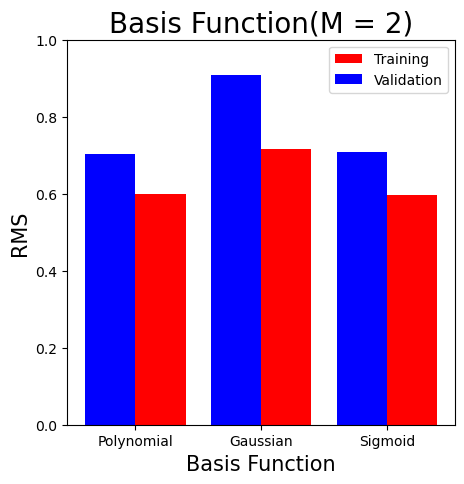

M = 2
Polynomial :

RMS_train : 0.5984609851256365
RMS_validation : 0.7039657061849073 

Gaussian :

RMS_train : 0.7165061245175866
RMS_validation : 0.9077090023386037 

Sigmoid :

RMS_train : 0.5975064974280028
RMS_validation : 0.7072726737896333 



In [12]:
#透過作圖觀察 M = 2 RMS的變化

RMS_basis_train = [RMS_M2_train[0], RMS_Gaussian_M2_train[0], RMS_sigmoid_M2_train[0]]
RMS_basis_validation = [RMS_M2_validation[0], RMS_Gaussian_M2_validation[0], RMS_sigmoid_M2_validation[0]]
#print(RMS_basis_train)
#print(RMS_basis_validation)
basis_label = ['Polynomial','Gaussian','Sigmoid']

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.bar(basis_label, RMS_basis_train, label = 'Training', align = "edge", width = 0.4,color = 'red')
plt.bar(basis_label, RMS_basis_validation, label = 'Validation', align = "edge", width = -0.4,color = 'blue')
plt.title("Basis Function(M = 2)", fontsize = 20)
plt.xlabel("Basis Function", fontsize = 15)
plt.ylabel("RMS", fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylim(0,1)
plt.legend(fontsize = 10)
plt.show()

print("M = 2\nPolynomial :\n")
print("RMS_train :",RMS_basis_train[0])
print("RMS_validation :",RMS_basis_validation[0],"\n")
print("Gaussian :\n")
print("RMS_train :",RMS_basis_train[1])
print("RMS_validation :",RMS_basis_validation[1],"\n")
print("Sigmoid :\n")
print("RMS_train :",RMS_basis_train[2])
print("RMS_validation :",RMS_basis_validation[2],"\n")

## 2.2(c)Apply N-fold cross-validation in your training stage to select at least one hyperparameter (order, parameter number, . . .) for model and do some discussion (underfitting,overfitting). 

## N-Fold

In [13]:
N = 15 #切成 N份

def nfold(n,M): #進行N-fold cross-validation
    val_num = int(total_num * (1/n))
    train_num = total_num - val_num
    RMS_train = np.zeros((1,n))
    RMS_val = np.zeros((1,n))
    if M == 1: # M = 1
        for i in range(n):
            val_x = data_x[i * val_num:(i + 1) * val_num,:]
            val_t = data_t[i * val_num:(i + 1) * val_num,:]
            train_x = np.delete(data_x, [range(i * val_num,((i + 1) * val_num))], axis=0)
            train_t = np.delete(data_t, [range(i * val_num,((i + 1) * val_num))], axis=0)
            weight_m1 = least_square(train_x,train_t)
            predict_train = np.dot(train_x,weight_m1[1:]) + weight_m1[0]
            RMS_train[0,i] = RMS_error(predict_train,train_t)
            predict_val = np.dot(val_x,weight_m1[1:]) + weight_m1[0]
            RMS_val[0,i] = RMS_error(predict_val,val_t) 
        
    else: # M = 2
        for i in range(n):
            val_x = data_x[i * val_num:(i + 1) * val_num,:]
            val_t = data_t[i * val_num:(i + 1) * val_num,:]
            train_x = np.delete(data_x, [range(i * val_num,((i + 1) * val_num))], axis=0)
            train_t = np.delete(data_t, [range(i * val_num,((i + 1) * val_num))], axis=0)
            weight_m2,phi_train = transform_phi_least_square(len(train_x),train_x,train_t) 
            predict_train = np.dot(phi_train,weight_m2)
            RMS_train[0,i] = RMS_error(predict_train,train_t)
            temp_weight_m2,phi_val = transform_phi_least_square(len(val_x),val_x,val_t) 
            predict_val = np.dot(phi_val,weight_m2)
            RMS_val[0,i] = RMS_error(predict_val,val_t) 
    return np.mean(RMS_train),np.mean(RMS_val)

Nfold_RMS_M1_train, Nfold_RMS_M1_validation = nfold(N,1)
Nfold_RMS_M2_train, Nfold_RMS_M2_validation = nfold(N,2)
print("N-fold cross-validation :\n")
print("Nfold_RMS_M1_train :",Nfold_RMS_M1_train)
print("Nfold_RMS_M1_validation :",Nfold_RMS_M1_validation,"\n")
print("Nfold_RMS_M2_train :",Nfold_RMS_M2_train)
print("Nfold_RMS_M2_validation :",Nfold_RMS_M2_validation)            

N-fold cross-validation :

Nfold_RMS_M1_train : 0.6450820990560003
Nfold_RMS_M1_validation : 0.657030609669643 

Nfold_RMS_M2_train : 0.6070300837292647
Nfold_RMS_M2_validation : 0.6766228072031518


## Plot N-fold前後RMS的變化

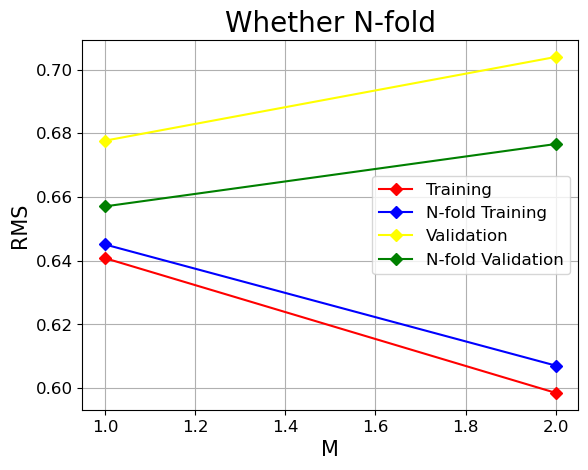

In [14]:
#透過作圖觀察N-fold前後RMS的變化

rms_train = [RMS_M1_train[0], RMS_M2_train[0], Nfold_RMS_M1_train, Nfold_RMS_M2_train]
rms_validation = [RMS_M1_validation[0], RMS_M2_validation[0], Nfold_RMS_M1_validation, Nfold_RMS_M2_validation]

import matplotlib.pyplot as plt
plt.plot([1,2],[rms_train[0],rms_train[1]],color='red',marker = "D",label='Training')
plt.plot([1,2],[rms_train[2],rms_train[3]],color='blue',marker = "D",label='N-fold Training')
plt.plot([1,2],[rms_validation[0],rms_validation[1]],color='yellow',marker = "D",label='Validation')
plt.plot([1,2],[rms_validation[2],rms_validation[3]],color='green',marker = "D",label='N-fold Validation')
plt.xlabel('M', fontsize = 15)
plt.ylabel('RMS', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Whether N-fold", fontsize = 20)
plt.legend(loc=0, fontsize = 12)
plt.grid(True)
plt.show()

此題我做N-fold的函數是我所選擇的polynomial，我選擇使用階數(M)當作我的Hyperparameter，並作圖比較N-fold前後RMS的變化。
我用的是N=15的N-fold，也就是將所有Data切成15份並分別輪流將每份當作validation去計算RMS並取15份的平均值。
可以從上圖中觀察到做完N-fold後依然可以隨著階數上升而減少RMS值，也能有效的減少Overfitting的狀況，可以看出N-fold validation的RMS值比沒做之前的小。


# 2.3 Maximum a posteriori approach

## (a) What is the key difference between maximum likelihood approach and maximum a posteriori approach?

Maximum likelihood和MAP的差別在於MAP有考慮進prior的影響，Maximum likelihood只會受到Data的影響曲尋找最可能的結果，而MAP則會同時考慮Data和prior的影響來尋找結果。
而其中的key difference則是MAP的RMS加上了Regularization項來有效減少overfitting的發生。


## (b) Use maximum a posteriori approach method to retest the model in 2.2 you designed.You could choose Gaussian distribution as a prior.

## Polynomial posterior M = 1

In [15]:
run_num = 51 #可以隨便設想要Lambda從1跑到多少

def least_square_posterior(datax, datat, Lambda): #用來求posterior w的最小平方解(加入lambda)
    weight_const = np.ones((len(datax),1)) 
    phi = np.concatenate((weight_const,datax),axis = 1)
    return np.dot(np.dot(np.linalg.pinv(np.dot(phi.T,phi) + Lambda*np.identity(Dimension + 1)),phi.T),datat)
def RMS_error_posterior(predict, real, Lambda, weight): #計算RMS Error for posterior
    error = 0
    for i in range(len(predict)):
        error += (predict[i] - real[i])**2
    return np.sqrt((error + Lambda * np.dot(weight.T,weight))/len(predict))

RMS_M1_train_posterior = np.zeros((1,run_num-1))
RMS_M1_validation_posterior = np.zeros((1,run_num-1))

for i in range(1,run_num): #跑lambda從1到run_num的RMS
    posterior_weight_M1 = least_square_posterior(data_train_x, data_train_t, i)
    predict_train_posterior = np.dot(data_train_x, posterior_weight_M1[1:]) + posterior_weight_M1[0]
    RMS_M1_train_posterior[0,i-1] = RMS_error_posterior(predict_train_posterior, data_train_t, i, posterior_weight_M1)
    predict_validation_posterior = np.dot(data_validation_x,posterior_weight_M1[1:]) + posterior_weight_M1[0]
    RMS_M1_validation_posterior[0,i-1] = RMS_error_posterior(predict_validation_posterior, data_validation_t, i, posterior_weight_M1)
#print(RMS_M1_train_posterior.shape)  
#print(RMS_M1_validation_posterior)

for i in range(run_num - 1): #印出lambda增加時RMS的變化
    print("Lambda = ",i+1)
    print("RMS_M1_train_posterior :",RMS_M1_train_posterior[0,i])
    print("RMS_M1_validation_posterior :",RMS_M1_validation_posterior[0,i],"\n")
    

Lambda =  1
RMS_M1_train_posterior : 0.6462695534425139
RMS_M1_validation_posterior : 0.7020977847128903 

Lambda =  2
RMS_M1_train_posterior : 0.6491915858885726
RMS_M1_validation_posterior : 0.7111692602434343 

Lambda =  3
RMS_M1_train_posterior : 0.6512848088147805
RMS_M1_validation_posterior : 0.7172156686875596 

Lambda =  4
RMS_M1_train_posterior : 0.6529713246774256
RMS_M1_validation_posterior : 0.7221169659433205 

Lambda =  5
RMS_M1_train_posterior : 0.6544158562629062
RMS_M1_validation_posterior : 0.7263840094340647 

Lambda =  6
RMS_M1_train_posterior : 0.6556977697843859
RMS_M1_validation_posterior : 0.7302131625310543 

Lambda =  7
RMS_M1_train_posterior : 0.6568610336600809
RMS_M1_validation_posterior : 0.7337024752067451 

Lambda =  8
RMS_M1_train_posterior : 0.6579325723945388
RMS_M1_validation_posterior : 0.7369113837159297 

Lambda =  9
RMS_M1_train_posterior : 0.658930163741835
RMS_M1_validation_posterior : 0.7398810136189194 

Lambda =  10
RMS_M1_train_posterior : 

## Polynomial posterior M = 2

In [16]:
def transform_phi_least_square_posterior(number, datax, datat, Lambda): #製作M=2的Phi並算出weight
    weight_const = np.ones((number,1))
    temp_matrix = np.zeros((number,Dimension*Dimension))
    for i in range(number):
        temp = 0
        for j in range(Dimension):
            for k in range(Dimension):
                temp_matrix[i,temp] = datax[i,j] * datax[i,k]
                temp += 1
    phi = np.concatenate((weight_const, datax, temp_matrix),axis = 1)
    #print(phi)
    return np.dot(np.dot(np.linalg.pinv(np.dot(phi.T,phi) + Lambda * np.identity(Dimension**2 + Dimension + 1)),phi.T),datat),phi

RMS_M2_train_posterior = np.zeros((1,run_num-1))
RMS_M2_validation_posterior = np.zeros((1,run_num-1))

for i in range(1,run_num): #跑lambda從1到run_num的RMS
    posterior_weight_M2,phi_1 = transform_phi_least_square_posterior(t_num, data_train_x, data_train_t, i)
    predict_train_posterior_m2 = np.dot(phi_1, posterior_weight_M2) 
    RMS_M2_train_posterior[0,i-1] = RMS_error_posterior(predict_train_posterior_m2, data_train_t, i, posterior_weight_M2)
    temp_weight,phi_2 = transform_phi_least_square_posterior(v_num, data_validation_x, data_validation_t, i)
    predict_validation_posterior_m2 = np.dot(phi_2, posterior_weight_M2)
    RMS_M2_validation_posterior[0,i-1] = RMS_error_posterior(predict_validation_posterior_m2, data_validation_t, i, posterior_weight_M2)  

#print(RMS_M2_train_posterior.shape)  
#print(RMS_M2_validation_posterior)

for i in range(run_num - 1): #印出lambda增加時RMS的變化
    print("Lambda = ",i+1)
    print("RMS_M2_train_posterior :",RMS_M2_train_posterior[0,i])
    print("RMS_M2_validation_posterior :",RMS_M2_validation_posterior[0,i],"\n")

Lambda =  1
RMS_M2_train_posterior : 0.6073963580743086
RMS_M2_validation_posterior : 0.6946550181633245 

Lambda =  2
RMS_M2_train_posterior : 0.6091786821598503
RMS_M2_validation_posterior : 0.6903526966959063 

Lambda =  3
RMS_M2_train_posterior : 0.6103077746693011
RMS_M2_validation_posterior : 0.6883944315474206 

Lambda =  4
RMS_M2_train_posterior : 0.6111292842754024
RMS_M2_validation_posterior : 0.6871708085298471 

Lambda =  5
RMS_M2_train_posterior : 0.6117718576299316
RMS_M2_validation_posterior : 0.6863024442766865 

Lambda =  6
RMS_M2_train_posterior : 0.612298354229672
RMS_M2_validation_posterior : 0.6856529662855487 

Lambda =  7
RMS_M2_train_posterior : 0.6127441727019511
RMS_M2_validation_posterior : 0.6851571992431342 

Lambda =  8
RMS_M2_train_posterior : 0.6131311196009566
RMS_M2_validation_posterior : 0.6847770637874693 

Lambda =  9
RMS_M2_train_posterior : 0.613473499969294
RMS_M2_validation_posterior : 0.6844877525798267 

Lambda =  10
RMS_M2_train_posterior : 0

## Plot RMS with Lambda

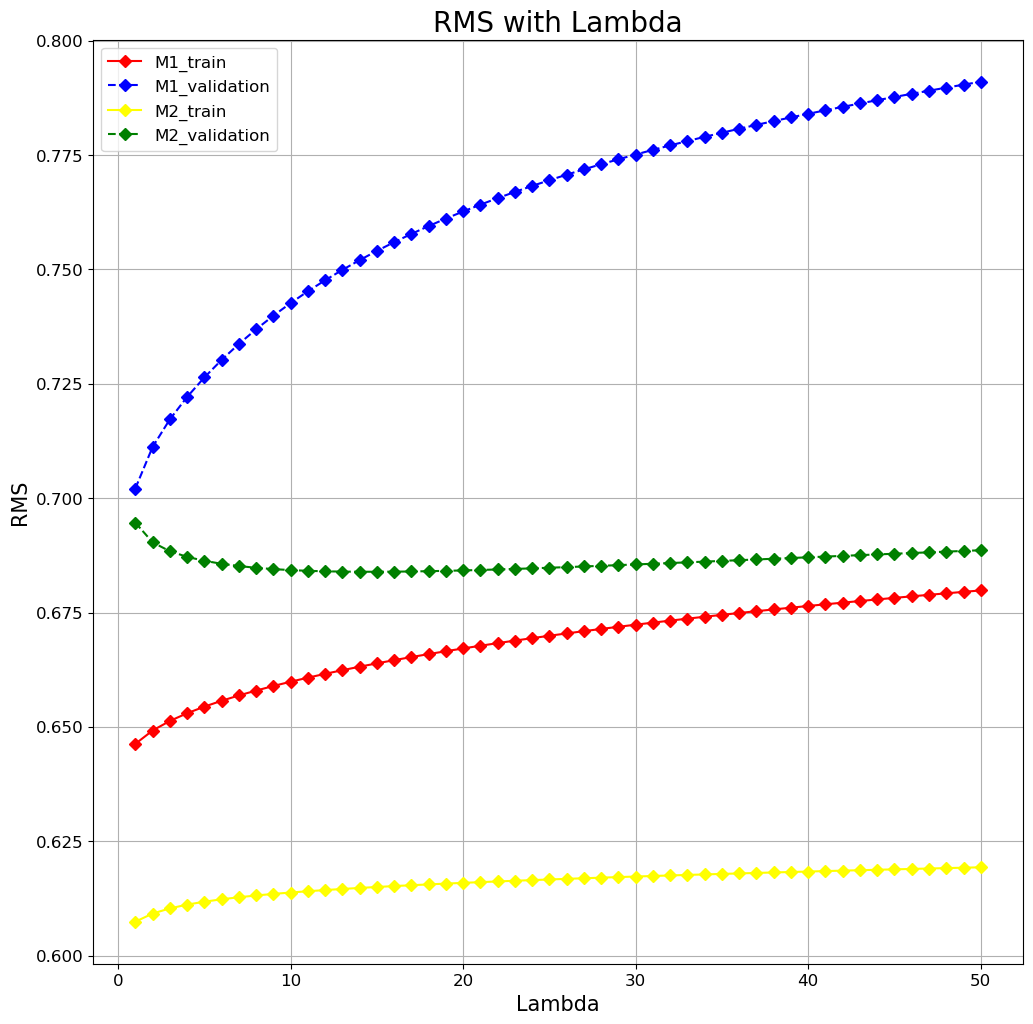

In [17]:
#透過作圖觀察RMS隨Lambda的變化

run = np.arange(1,run_num)
#print(run)
list_RMS_M1_train_posterior = []
list_RMS_M1_validation_posterior = []
list_RMS_M2_train_posterior = []
list_RMS_M2_validation_posterior = []
for i in range(run_num - 1):
    list_RMS_M1_train_posterior.append(float(RMS_M1_train_posterior[0,i]))
    list_RMS_M1_validation_posterior.append(float(RMS_M1_validation_posterior[0,i]))
    list_RMS_M2_train_posterior.append(float(RMS_M2_train_posterior[0,i]))
    list_RMS_M2_validation_posterior.append(float(RMS_M2_validation_posterior[0,i]))

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.plot(run, list_RMS_M1_train_posterior, color='red', marker = "D", label='M1_train')
plt.plot(run, list_RMS_M1_validation_posterior, "--", color='blue', marker = "D", label='M1_validation')
plt.plot(run, list_RMS_M2_train_posterior, color='yellow', marker = "D", label='M2_train')
plt.plot(run, list_RMS_M2_validation_posterior, "--", color='green', marker = "D", label='M2_validation')
plt.xlabel('Lambda', fontsize = 15)
plt.ylabel('RMS', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("RMS with Lambda", fontsize = 20)
plt.legend(loc = 0, fontsize = 12)
plt.grid(True)
plt.show()

## Plot RMS whether Lambda or not

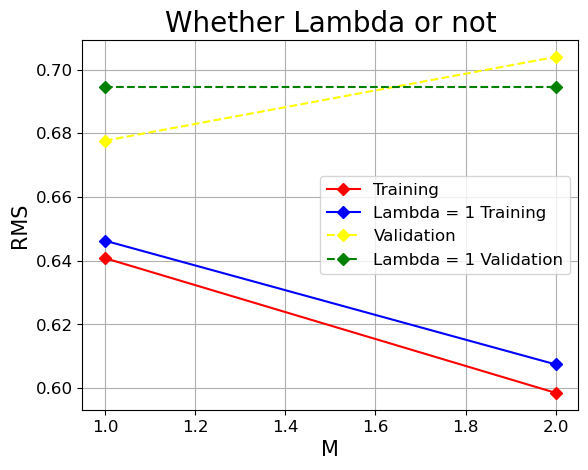

In [18]:
#透過作圖觀察MAP和MLE的RMS變化

rms_train_map = [RMS_M1_train[0], RMS_M2_train[0], RMS_M1_train_posterior[0,0], RMS_M2_train_posterior[0,0]]
rms_validation_map = [RMS_M1_validation[0], RMS_M2_validation[0], RMS_M2_validation_posterior[0,0], RMS_M2_validation_posterior[0,0]]

import matplotlib.pyplot as plt
plt.plot([1,2],[rms_train_map[0], rms_train_map[1]], color='red',marker = "D", label='Training')
plt.plot([1,2],[rms_train_map[2], rms_train_map[3]], color='blue',marker = "D", label='Lambda = 1 Training')
plt.plot([1,2],[rms_validation_map[0], rms_validation_map[1]], "--", color='yellow', marker = "D", label='Validation')
plt.plot([1,2],[rms_validation_map[2], rms_validation_map[3]], "--", color='green', marker = "D", label='Lambda = 1 Validation')
plt.xlabel('M', fontsize = 15)
plt.ylabel('RMS', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Whether Lambda or not", fontsize = 20)
plt.legend(loc=0, fontsize = 12)
plt.grid(True)
plt.show()

## (c) Compare the result between maximum likelihood approach and maximum a posteriori approach. Is it consistent with your conclusion in (a)?

由上圖的結果可以發現 MAP 的 training 雖然變大但是
validation 變小了，表示有幫助減少 overfitting 的問題。
在沒有加入 prior 前，隨著階數上升， overfitting 也跟著變嚴
重；在有 prior 加入後，即便階數上升，雖然還有一點
overfitting，但明顯減少很多。從作圖的結果可發現，做 MAP(加
入 prior)確實有降低 overfitting 的效果並且可以保護 model 對策
是資料的預測，有效降低 training 和 validation 之間的誤差，與我a小題的結論一致。